In [1]:
import datetime
import os
import backtrader as bt

In [2]:
class MyStrat(bt.Strategy):
        
    def next(self):
        # limit orders on spy
        if not self.positionsbyname['spy'] and not self.open_orders_by_dname['spy']:
            # buy limit order
            self.buy(size=10, data=self.dnames['spy'], exectype=bt.Order.Limit, price=240)
        elif self.positionsbyname['spy'] and not  self.open_orders_by_dname['spy']:
            # sell limit order
            self.close(data=self.dnames['spy'], exectype=bt.Order.Limit, price=300)
            
        # stop orders on gld
        if not self.positionsbyname['gld'] and not self.open_orders_by_dname['gld']:
            # buy stop order
            self.buy(size=10, data=self.dnames['gld'], exectype=bt.Order.Stop, price=145)
        elif self.positionsbyname['gld'] and not  self.open_orders_by_dname['gld']:
            # sell stop order
            self.close(data=self.dnames['gld'], exectype=bt.Order.Stop, price=140)
        
        # stoplimit and trail limit orders on oil
        if not self.positionsbyname['uso'] and not self.open_orders_by_dname['uso']:
            # buy stoplimit order
            # buy oil if price goes up 2%, use limit order of 103% of current price
            self.buy(
                size=10,
                data=self.dnames['uso'],
                exectype=bt.Order.StopLimit,
                price=self.dnames['uso'].close[0]*1.02,
                plimit=self.dnames['uso'].close[0]*1.03
            )
        elif self.positionsbyname['uso'] and not  self.open_orders_by_dname['uso']:
            # sell stop trail order
            # sell whenever price drops 5% off high
            self.close(
                data=self.dnames['uso'],
                exectype=bt.Order.StopTrail,
                trailpercent=.05
            )
            
    @property
    def open_orders_by_dname(self):
        '''return dictionary with data names as keys and corresponding open orders as values'''
        oobd = {data._name: [] for data in self.datas}
        for order in self.broker.get_orders_open():
            oobd[order.data._name].append(order)
        return oobd
    

In [3]:
cerebro = bt.Cerebro()

cerebro.addstrategy(MyStrat)

fromdate, todate = datetime.datetime(2019, 6, 15), datetime.datetime(2020, 6, 1)
folder = 'ETF'
for file in os.listdir(folder):
    dn = os.path.join(folder, file)
    data = bt.feeds.GenericCSVData(
        dataname=dn,
        fromdate=fromdate,
        todate=todate,
        nullvalue=0.0,
        dtformat=('%m/%d/%Y'),
        datetime=0,
        high=3,
        low=4,
        open=1,
        close=2,
        volume=5,
        openinterest=-1
    )
    cerebro.adddata(data)

cerebro.addanalyzer(bt.analyzers.Transactions)
cerebro.broker.setcash(10000)
cerebro.broker.set_coc(True)
results = cerebro.run()
strat = results[0]
cerebro.broker.getvalue()

10623.564

<IPython.core.display.Javascript object>


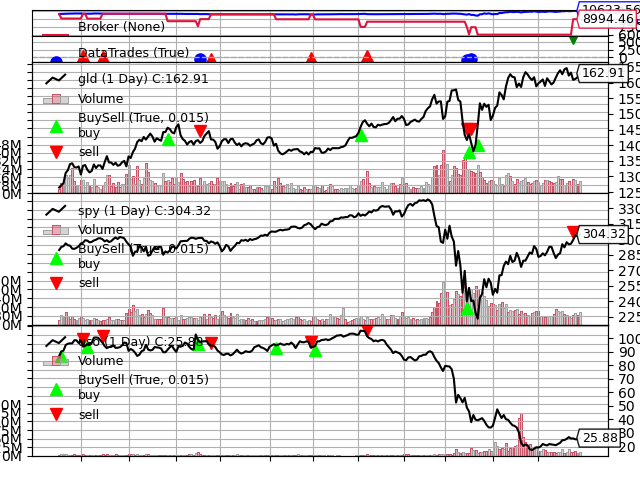

[[<Figure size 640x480 with 8 Axes>]]

In [4]:
cerebro.plot()